In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

from sklearn import mixture
from sklearn.ensemble import IsolationForest
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import tree
from scipy.stats import ks_2samp

from sklearn.tree import export_text

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [2]:
!cat tmp.py

        G = nx.DiGraph()
        G.add_edges_from(edges_list)


        sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )

    def create_4d_X_from_files():

        true_agent_labels = pd.read_csv('agents_list.csv')
        true_agent_labels.columns=['sender_id', 'true_sender_type']

        edges = pd.read_csv('nx_edges_list.csv')
        node_degs = pd.read_csv('tabular_graph_features.csv')
        #node_degs.columns=['sender_id', 'in_degree', 'out_degree']
        return edges, node_degs

        clf = mixture.GaussianMixture(n_components=2,
                                      covariance_type="full",
                                      random_state = 123)
        plt.rcParams.update(plt.rcParamsDefault)
        sns.reset_defaults()
        sns.set_context('notebook')

        clf = IsolationForest(contamination=0.1,
                              random_state = 123).fit(X)
        y_pred = clf.fit_predict(X)

        fig, ax = plt.subplots() # TODO: fix fig

In [3]:
# read files
true_agent_labels = pd.read_csv('agents_list.csv')
true_agent_labels.columns=['sender_id', 'true_sender_type']
edges = pd.read_csv('nx_edges_list.csv')
node_degs = pd.read_csv('tabular_graph_features.csv')
#node_degs.columns=['sender_id', 'in_degree', 'out_degree']


In [4]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns.dtypes
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
display(txns.sample())


,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
39,27,2022-10-31 06:45:00,25,566,normal,-4786.38052,2022-10-31 06:45:00,0


In [5]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,34,2022-10-31 08:30:00,1,977,normal,-5890.563987,2022-10-31 08:30:00,0
1,47,2022-10-31 11:45:00,1,462,normal,-4804.731550,2022-10-31 11:45:00,0
2,35,2022-10-31 08:45:00,2,217,normal,-5070.341146,2022-10-31 08:45:00,0
3,47,2022-10-31 11:45:00,2,250,normal,-7029.970881,2022-10-31 11:45:00,0
4,35,2022-10-31 08:45:00,3,952,normal,-4448.410038,2022-10-31 08:45:00,0
...,...,...,...,...,...,...,...,...
1902,87,2022-10-31 21:45:00,1010,1004,suspicious,-1367.083779,2022-10-31 21:45:00,1
1903,88,2022-10-31 22:00:00,1010,1005,suspicious,-867.571129,2022-10-31 22:00:00,1
1904,93,2022-10-31 23:15:00,1010,745,suspicious,-1140.758246,2022-10-31 23:15:00,1
1905,95,2022-10-31 23:45:00,1010,988,suspicious,-842.889037,2022-10-31 23:45:00,1


In [6]:
sender_info = pd.DataFrame(txns.sender_id.unique(), columns=['sender_id'])
sender_info['txns'] = None
sender_info['txn_mean_time'] = None
# convert datatype to numpy array
sender_info.txns = sender_info.txns.astype(object)
display(sender_info.sample())

all_my_txns = []
#for id in [1,2]:
for id in sender_info.sender_id:
    my_txns = txns[txns.sender_id == id].timestep
    #print(my_txns.to_list())
    all_my_txns.append(my_txns.to_list())
sender_info['txns'] = pd.Series(all_my_txns)
display(sender_info.iloc[1])
sender_info['txn_mean_time'] = sender_info['txns'].apply(np.mean)
#sender_info['label_by_mean_txn_time'] = 
sender_info


,sender_id,txns,txn_mean_time
413,424,None,None


sender_id               2
txns             [35, 47]
txn_mean_time        None
Name: 1, dtype: object

,sender_id,txns,txn_mean_time
0,1,"[34, 47]",40.500000
1,2,"[35, 47]",41.000000
2,3,[35],35.000000
3,4,"[36, 43]",39.500000
4,5,[30],30.000000
...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667


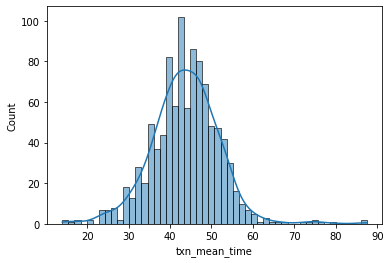

In [7]:
fig, ax = plt.subplots()
plt.set_xlim = [0,100]
sns.histplot(sender_info['txn_mean_time'], ax=ax, kde=True , bins=50)
#sns.kdeplot(sender_info['txn_mean_time'], ax=ax)
plt.show()

In [8]:
sender_info

,sender_id,txns,txn_mean_time
0,1,"[34, 47]",40.500000
1,2,"[35, 47]",41.000000
2,3,[35],35.000000
3,4,"[36, 43]",39.500000
4,5,[30],30.000000
...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667


In [9]:
node_degs.columns=['sender_id', 'in_degree', 'out_degree']
node_degs

,sender_id,in_degree,out_degree
0,1,2,2
1,977,3,4
2,462,3,1
3,2,2,2
4,217,4,5
...,...,...,...
999,979,0,1
1000,980,0,1
1001,983,0,1
1002,985,0,1


In [10]:
sender_info = sender_info.merge(node_degs)

In [11]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,34,2022-10-31 08:30:00,1,977,normal,-5890.563987,2022-10-31 08:30:00,0
1,47,2022-10-31 11:45:00,1,462,normal,-4804.731550,2022-10-31 11:45:00,0
2,35,2022-10-31 08:45:00,2,217,normal,-5070.341146,2022-10-31 08:45:00,0
3,47,2022-10-31 11:45:00,2,250,normal,-7029.970881,2022-10-31 11:45:00,0
4,35,2022-10-31 08:45:00,3,952,normal,-4448.410038,2022-10-31 08:45:00,0
...,...,...,...,...,...,...,...,...
1902,87,2022-10-31 21:45:00,1010,1004,suspicious,-1367.083779,2022-10-31 21:45:00,1
1903,88,2022-10-31 22:00:00,1010,1005,suspicious,-867.571129,2022-10-31 22:00:00,1
1904,93,2022-10-31 23:15:00,1010,745,suspicious,-1140.758246,2022-10-31 23:15:00,1
1905,95,2022-10-31 23:45:00,1010,988,suspicious,-842.889037,2022-10-31 23:45:00,1


In [12]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree
0,1,"[34, 47]",40.500000,2,2
1,2,"[35, 47]",41.000000,2,2
2,3,[35],35.000000,3,1
3,4,"[36, 43]",39.500000,2,2
4,5,[30],30.000000,0,1
...,...,...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11


In [13]:
txns

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
0,34,2022-10-31 08:30:00,1,977,normal,-5890.563987,2022-10-31 08:30:00,0
1,47,2022-10-31 11:45:00,1,462,normal,-4804.731550,2022-10-31 11:45:00,0
2,35,2022-10-31 08:45:00,2,217,normal,-5070.341146,2022-10-31 08:45:00,0
3,47,2022-10-31 11:45:00,2,250,normal,-7029.970881,2022-10-31 11:45:00,0
4,35,2022-10-31 08:45:00,3,952,normal,-4448.410038,2022-10-31 08:45:00,0
...,...,...,...,...,...,...,...,...
1902,87,2022-10-31 21:45:00,1010,1004,suspicious,-1367.083779,2022-10-31 21:45:00,1
1903,88,2022-10-31 22:00:00,1010,1005,suspicious,-867.571129,2022-10-31 22:00:00,1
1904,93,2022-10-31 23:15:00,1010,745,suspicious,-1140.758246,2022-10-31 23:15:00,1
1905,95,2022-10-31 23:45:00,1010,988,suspicious,-842.889037,2022-10-31 23:45:00,1


In [14]:
sender_info.txns.apply(lambda x: len(x))
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree
0,1,"[34, 47]",40.500000,2,2
1,2,"[35, 47]",41.000000,2,2
2,3,[35],35.000000,3,1
3,4,"[36, 43]",39.500000,2,2
4,5,[30],30.000000,0,1
...,...,...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11


In [15]:
from sklearn import tree


In [16]:
sender_info['num_txns'] = sender_info.txns.apply(len)

In [17]:
#from sklearn.model_selection import cross_val_score
#cross_val_score(clf, features, sender_info.y_true_type, cv=10)

In [18]:
sender_info.shape

(994, 6)

In [19]:
sender_info.columns

Index(['sender_id', 'txns', 'txn_mean_time', 'in_degree', 'out_degree',
       'num_txns'],
      dtype='object')

In [20]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
989,1006,suspicious
990,1007,suspicious
991,1008,suspicious
992,1009,suspicious


# export x 

In [21]:
sender_info = sender_info.merge(true_agent_labels)
try:
    sender_info.drop(['y_pred'], axis=1).to_csv('processed_for_X.csv')
except:
    sender_info.to_csv('processed_for_X.csv')
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type
0,1,"[34, 47]",40.500000,2,2,2,normal
1,2,"[35, 47]",41.000000,2,2,2,normal
2,3,[35],35.000000,3,1,1,normal
3,4,"[36, 43]",39.500000,2,2,2,normal
4,5,[30],30.000000,0,1,1,normal
...,...,...,...,...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious


In [22]:
np.random.random((19,2))

array([[0.0735065 , 0.297316  ],
       [0.33940131, 0.39887785],
       [0.6423632 , 0.32743677],
       [0.67438688, 0.6360983 ],
       [0.3532855 , 0.04365888],
       [0.53389874, 0.64360349],
       [0.41841578, 0.12773518],
       [0.89361964, 0.3777358 ],
       [0.35523013, 0.24414219],
       [0.13089826, 0.79343859],
       [0.5623056 , 0.26722475],
       [0.918374  , 0.94614943],
       [0.38483599, 0.59924693],
       [0.27494865, 0.97673971],
       [0.16132697, 0.97297895],
       [0.99054219, 0.29726987],
       [0.40328202, 0.44328149],
       [0.98013955, 0.72001635],
       [0.53825121, 0.23275507]])

# tRee

In [23]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type
0,1,"[34, 47]",40.500000,2,2,2,normal
1,2,"[35, 47]",41.000000,2,2,2,normal
2,3,[35],35.000000,3,1,1,normal
3,4,"[36, 43]",39.500000,2,2,2,normal
4,5,[30],30.000000,0,1,1,normal
...,...,...,...,...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious


In [24]:
sender_info

,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type
0,1,"[34, 47]",40.500000,2,2,2,normal
1,2,"[35, 47]",41.000000,2,2,2,normal
2,3,[35],35.000000,3,1,1,normal
3,4,"[36, 43]",39.500000,2,2,2,normal
4,5,[30],30.000000,0,1,1,normal
...,...,...,...,...,...,...,...
989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious
990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious
991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious
992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious


# reset x

In [25]:
def reset_X():
    sender_info = pd.read_csv('./processed_for_X.csv')
    sender_info = sender_info.merge(true_agent_labels)
    sender_info = sender_info.merge(node_degs)
    sender_info['y_true'] = sender_info.true_sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
    X = sender_info[['txn_mean_time', 'in_degree', 'out_degree','y_true', 'num_txns']]
    #X = X.rename(columns={'y_true_type': 'y_true'})
    #display('reset X, sample X', X.sample())
    #display('reset X', X.columns) 
    return sender_info, X
sender_info, X = reset_X()

In [26]:
sender_info

,Unnamed: 0,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type,y_true
0,0,1,"[34, 47]",40.500000,2,2,2,normal,0
1,1,2,"[35, 47]",41.000000,2,2,2,normal,0
2,2,3,[35],35.000000,3,1,1,normal,0
3,3,4,"[36, 43]",39.500000,2,2,2,normal,0
4,4,5,[30],30.000000,0,1,1,normal,0
...,...,...,...,...,...,...,...,...,...
989,989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious,1
990,990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious,1
991,991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious,1
992,992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious,1


[Text(0.6, 0.875, 'X[0] <= 6.5\ngini = 0.02\nsamples = 994\nvalue = [984, 10]'),
 Text(0.4, 0.625, 'X[0] <= 4.5\ngini = 0.006\nsamples = 987\nvalue = [984, 3]'),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 973\nvalue = [973, 0]'),
 Text(0.6, 0.375, 'X[0] <= 5.5\ngini = 0.337\nsamples = 14\nvalue = [11, 3]'),
 Text(0.4, 0.125, 'gini = 0.298\nsamples = 11\nvalue = [9, 2]'),
 Text(0.8, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

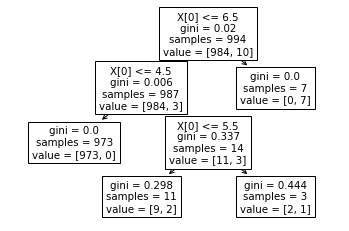

In [27]:
X = sender_info[['txn_mean_time', 'in_degree', 'out_degree', 'num_txns']]
X = sender_info[['in_degree', 'out_degree', 'num_txns']]
X = sender_info[['in_degree', 'out_degree']]
X = sender_info[['in_degree']]
X = sender_info[['out_degree']]
#X = sender_info[['num_txns']]
#X = sender_info[['txn_mean_time']]
#X = np.random.random(sender_info.shape)
y_true = sender_info.y_true

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X, y_true)
tree.plot_tree(clf, max_depth=10)

In [28]:
y_pred = clf.predict(X)

In [29]:
sender_info.columns

Index(['Unnamed: 0', 'sender_id', 'txns', 'txn_mean_time', 'in_degree',
       'out_degree', 'num_txns', 'true_sender_type', 'y_true'],
      dtype='object')

In [30]:
sender_info

,Unnamed: 0,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type,y_true
0,0,1,"[34, 47]",40.500000,2,2,2,normal,0
1,1,2,"[35, 47]",41.000000,2,2,2,normal,0
2,2,3,[35],35.000000,3,1,1,normal,0
3,3,4,"[36, 43]",39.500000,2,2,2,normal,0
4,4,5,[30],30.000000,0,1,1,normal,0
...,...,...,...,...,...,...,...,...,...
989,989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious,1
990,990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious,1
991,991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious,1
992,992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious,1


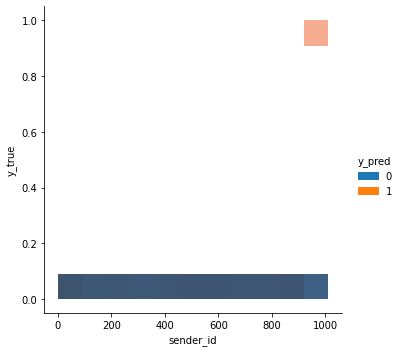

In [31]:
sender_info['y_pred'] = y_pred
sns.displot(
data=sender_info, x='sender_id', y='y_true', hue='y_pred')


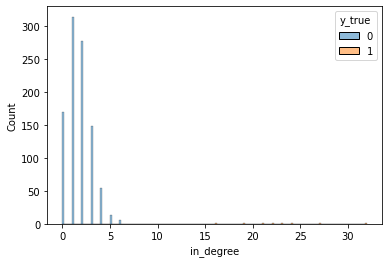

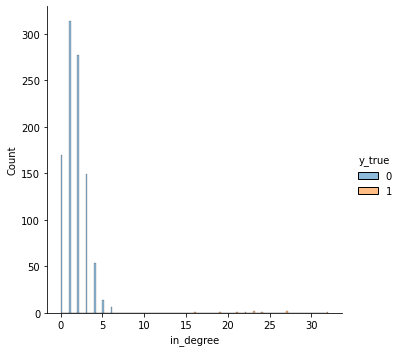

In [32]:
sns.histplot(data=sender_info, x='in_degree', hue='y_true')
sns.displot(data=sender_info, x='in_degree', hue='y_true')

In [33]:
# MARK

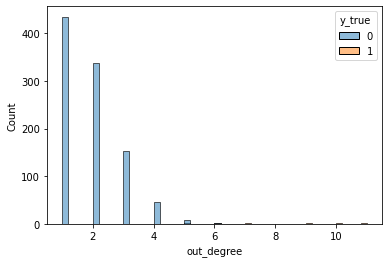

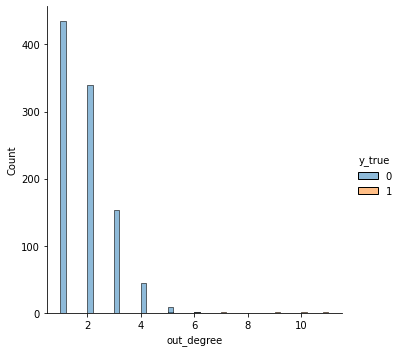

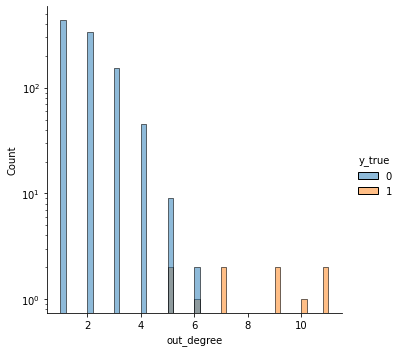

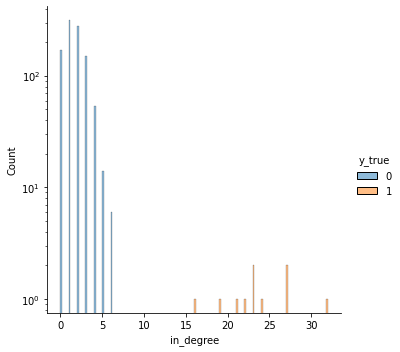

In [34]:
sns.histplot(data=sender_info, x='out_degree', hue='y_true')
sns.displot(data=sender_info, x='out_degree', hue='y_true')
g1 = sns.displot(data=sender_info, x='out_degree', hue='y_true', )
g1.set(yscale='log')
g2 = sns.displot(data=sender_info, x='in_degree', hue='y_true', )
g2.set(yscale='log')
#sns.displot(data=sender_info[sender_info.y_true_type==1], x='out_degree', hue='y_true_type')
#sns.displot(data=sender_info[sender_info.y_true_type==0], x='out_degree', hue='y_true_type')

In [35]:
# what is mean out degree of true vs false
# what is mea in degree

In [36]:

sender_info = sender_info.merge(true_agent_labels)

In [37]:
sender_info

,Unnamed: 0,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type,y_true,y_pred
0,0,1,"[34, 47]",40.500000,2,2,2,normal,0,0
1,1,2,"[35, 47]",41.000000,2,2,2,normal,0,0
2,2,3,[35],35.000000,3,1,1,normal,0,0
3,3,4,"[36, 43]",39.500000,2,2,2,normal,0,0
4,4,5,[30],30.000000,0,1,1,normal,0,0
...,...,...,...,...,...,...,...,...,...,...
989,989,1006,"[2, 77, 78, 81, 84, 85, 86, 89, 96]",75.333333,23,9,9,suspicious,1,1
990,990,1007,"[8, 73, 83, 84, 86, 87, 91]",73.142857,27,5,7,suspicious,1,0
991,991,1008,"[1, 72, 75, 81, 82, 85, 86, 87, 88, 89, 91, 92...",79.785714,22,11,14,suspicious,1,1
992,992,1009,"[1, 3, 76, 78, 79, 83, 84, 88, 89, 91, 93, 95]",71.666667,19,11,12,suspicious,1,1


In [38]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=1)
clf.fit(X, sender_info.y_true)

DecisionTreeClassifier(max_depth=1)

In [39]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
989,1006,suspicious
990,1007,suspicious
991,1008,suspicious
992,1009,suspicious


In [40]:
# X = txns.time.to_numpy().reshape(-1,1) # nah... let's just use integers
X = txns.timestep.to_numpy().reshape(-1,1)
X.shape

(1907, 1)

In [41]:
true_agent_labels

,sender_id,true_sender_type
0,1,normal
1,2,normal
2,3,normal
3,4,normal
4,5,normal
...,...,...
989,1006,suspicious
990,1007,suspicious
991,1008,suspicious
992,1009,suspicious


In [42]:
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
989,1006,suspicious,1
990,1007,suspicious,1
991,1008,suspicious,1
992,1009,suspicious,1


In [43]:
#  Create a simple logistic regression classifier for agent type. The input features are:
#– Timing of the ATM transactions
#- Time of day
#- Number of transactions
#– In- and out- degrees of each account
#– Note: For simplicity all nodes are labelled, though in reality very few are
#• Compare results on real and synthetic data

In [44]:
# time (mean)
# num of txns for agent
# in degrees
# out degress

# restart

In [45]:
X

array([[34],
       [47],
       [35],
       ...,
       [93],
       [95],
       [96]])

In [46]:
X

array([[34],
       [47],
       [35],
       ...,
       [93],
       [95],
       [96]])

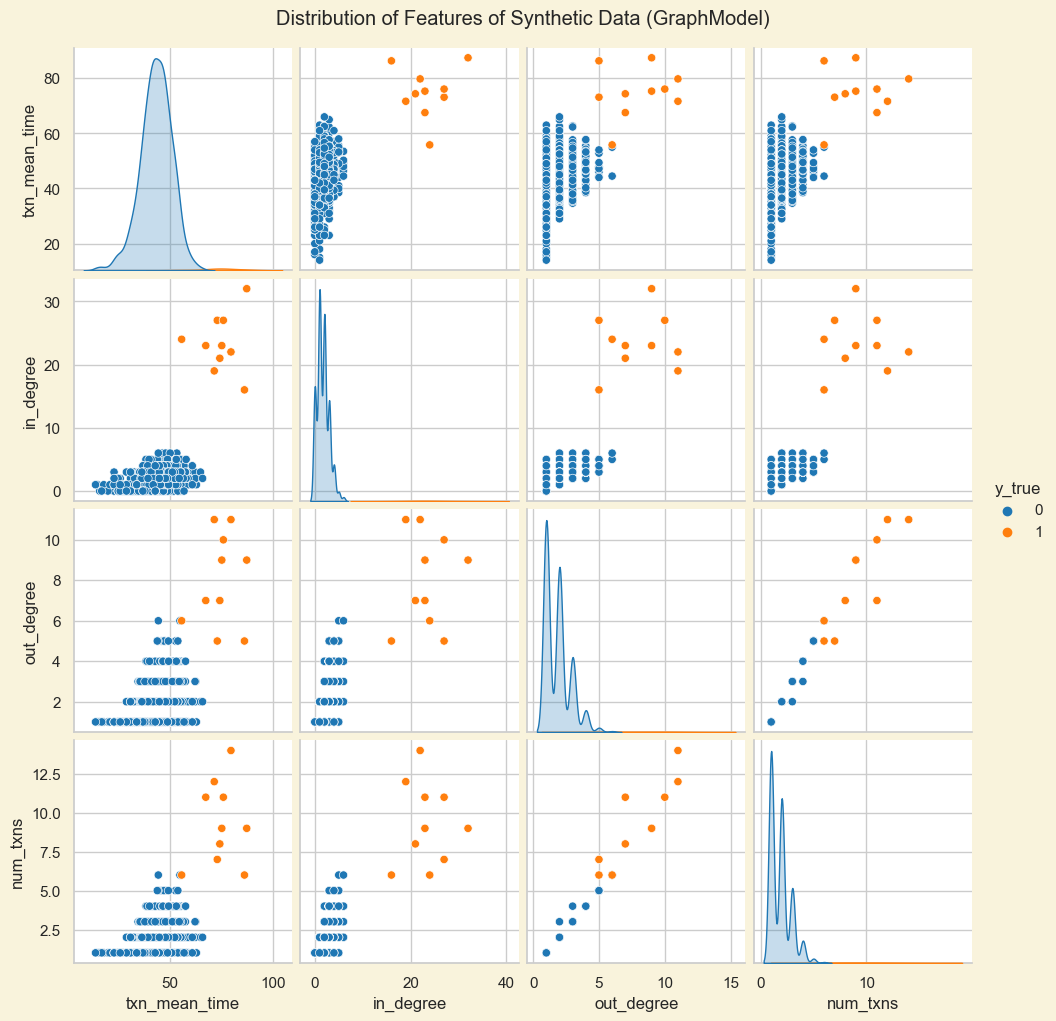

In [47]:
sender_info, X = reset_X()
plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')
sns.set_style('whitegrid')
VARS = ['txn_mean_time', 'in_degree', 'out_degree', 'num_txns']
g = sns.pairplot(X, x_vars=VARS, y_vars=VARS, hue='y_true')#, kind="kde")
TITLE = 'Distribution of Features of Synthetic Data (GraphModel)'
g.fig.suptitle(TITLE, y=1.02) # y= some height>1
g.fig.patch.set_facecolor('#F9F3DC')

Index(['txn_mean_time', 'in_degree', 'out_degree', 'y_true', 'num_txns',
       'y_pred'],
      dtype='object')
[0 1]


/var/folders/vf/d55y4h2118d7sg4jxtq8j44c0000gn/T/ipykernel_24928/1101289806.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y_pred'] = y_pred


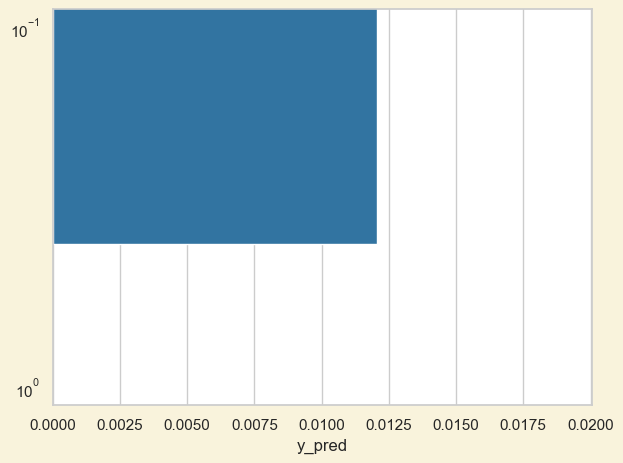

In [48]:
# MARK 
sender_info, X = reset_X()
clf = mixture.GaussianMixture(n_components=2,
                                covariance_type="full",
                                random_state = 123)

y_pred = clf.fit_predict(X)
X['y_pred'] = y_pred
print(X.columns)
print(X.y_pred.unique())

plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')
sns.set_style('whitegrid')
fig, ax = plt.subplots() # TODO: fix figsize to reasonable vals
#g = sns.histplot(data=X, x='y_pred')#hue='y_true', ax=ax,  )
g = sns.barplot(data=X, x='y_pred')#hue='y_true', ax=ax,  )
fig.patch.set_facecolor('#F9F3DC')
g.set(yscale='log')
plt.tight_layout()
#sns.stripplot(data=X, x='agent_id', y='sender_type', 
    #hue='y_pred', 
    #edgecolor='k', linewidth=0.2)
#clf = IsolationForest(contamination=0.1,
                        #random_state = 123).fit(X)
#y_pred = clf.fit_predict(X)
#sns.stripplot(data=txns, x='timestep', y='sender_type', hue='y_pred', )

In [49]:
def try_GMM():
    clf = mixture.GaussianMixture(n_components=2,
                                covariance_type="full",
                                random_state = 123)
    clf = clf.fit(X, y_true)
# classify against ... uh.... 
# let's see..



#def try_IF():


# viz graph

In [50]:
#import joblib
#G = joblib.load('./graph.networkx_v2.8.4.joblib')
#G

In [51]:
import networkx as nx

In [52]:
sender_info, X = reset_X()
true_agent_labels['true_label'] = true_agent_labels['true_sender_type'] != 'normal'  
# note that 0 = normal
true_agent_labels['true_label'] *= 1
true_agent_labels

sender_info
display(true_agent_labels)
for_graphs = sender_info.merge(true_agent_labels)

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
989,1006,suspicious,1
990,1007,suspicious,1
991,1008,suspicious,1
992,1009,suspicious,1


In [53]:
time_window= txns[(txns.timestep > 72) &(txns.timestep < 80)][['sender_id', 'receiver_id', 'y_true', 'timestep']] # 2hrs
edges_list = time_window[['sender_id', 'receiver_id']].to_numpy()
window_G = nx.DiGraph()
window_G.add_edges_from(edges_list)
window_G
window_G.nodes


NodeView((22, 372, 445, 63, 922, 1010, 935, 992, 1001, 1002, 1003, 995, 1004, 1006, 1005, 972, 1008, 1007, 876, 558, 1009, 283))

In [54]:
#window_G.nodes[47]

In [55]:
true_agent_labels[true_agent_labels.sender_id == 27]

,sender_id,true_sender_type,true_label
26,27,normal,0


In [56]:
#np.min(window_G.nodes)
true_agent_labels[true_agent_labels.sender_id == 27]

,sender_id,true_sender_type,true_label
26,27,normal,0


In [57]:
colors = []
for i in window_G.nodes():
    acct_type = true_agent_labels[true_agent_labels.sender_id==i].true_sender_type.to_numpy()[0]
    window_G.nodes[i]['type'] =  acct_type
    #print(acct_type)
    if acct_type == 'normal' :
        #colors.append('blue')
        #colors.append(0)
        colors.append('cornflowerblue')
    else:
        colors.append('tab:orange')
        #colors.append('orange')
        #colors.append('1')
#colors

In [58]:
# https://github.com/WestHealth/pyvis/issues/82

In [59]:
#ax.collections[0].set_edgecolor("#FF0000" )

#nx.draw(window_G, with_labels = True, arrows='False)
#nx.draw(window_G, with_labels = True, arrows=False, node_color=colors)
#nx.draw(window_G, with_labels = True, node_color = colors, pos=nx.random_layout(seed=123))
#pos=nx.random_layout(window_G,seed=123)
# https://networkx.org/documentation/stable/_modules/networkx/drawing/layout.html
#pos=nx.shell_layout(window_G)
#pos=nx.planar_layout(window_G)
#pos=nx.bipartite_layout(nodes=window_G.nodes, G=window_G)
#pos=nx.multipartite_layout(G=window_G)


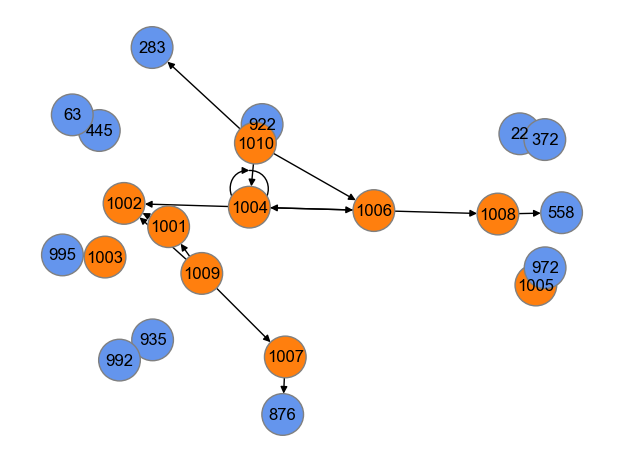

In [60]:
# https://networkx.org/documentation/networkx-2.1/_modules/networkx/drawing/nx_pylab.html#draw_networkx
#https://matplotlib.org/stable/gallery/color/named_colors.html
plt.rcParams.update(plt.rcParamsDefault)
sns.reset_defaults()
sns.set_context('notebook')
sns.set_style('whitegrid')
pos=nx.spring_layout(window_G, seed=42)
fig, ax = plt.subplots()
nx.draw(window_G, with_labels=True, node_color=colors, 
        pos=pos, edge_color='k', node_size=900, linewidths=1)
ax.collections[0].set_edgecolor("gray" )
plt.tight_layout()
plt.show()

In [61]:
G = window_G

In [62]:
time_window

,sender_id,receiver_id,y_true,timestep
35,22,372,0,74
780,445,63,0,76
1670,922,1010,0,79
1693,935,992,0,78
1814,1001,1002,1,74
1827,1003,995,1,79
1836,1004,1004,1,73
1837,1004,1006,1,75
1838,1004,1002,1,78
1845,1005,972,1,78


In [63]:
G = joblib.load('./graph.networkx_v2.8.4.joblib')

NameError: name 'joblib' is not defined

In [ ]:
true_agent_labels.iloc[829]
true_agent_labels[true_agent_labels.sender_id==829]

,sender_id,true_sender_type,true_label
819,829,normal,0


In [ ]:
txns[txns.sender_id == 829]

,timestep,timestep_to_time,sender_id,receiver_id,sender_type,amount,time,y_true
1516,43,2022-10-31 10:45:00,829,284,normal,-2226.189339,2022-10-31 10:45:00,0
1517,44,2022-10-31 11:00:00,829,942,normal,-4008.203416,2022-10-31 11:00:00,0


In [ ]:
829 in G.nodes
894 in G.nodes

True

In [ ]:
true_agent_labels

,sender_id,true_sender_type,true_label
0,1,normal,0
1,2,normal,0
2,3,normal,0
3,4,normal,0
4,5,normal,0
...,...,...,...
992,1006,suspicious,1
993,1007,suspicious,1
994,1008,suspicious,1
995,1009,suspicious,1


In [ ]:
np.array([])[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [85]:
txns.sender_id.unique().shape

(994,)

In [87]:
node_degs

,sender_id,in_degree,out_degree
0,1,2,2
1,977,3,4
2,462,3,1
3,2,2,2
4,217,4,5
...,...,...,...
999,979,0,1
1000,980,0,1
1001,983,0,1
1002,985,0,1


/var/folders/vf/d55y4h2118d7sg4jxtq8j44c0000gn/T/ipykernel_24928/2174402592.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if acct_type == 'normal' :
/var/folders/vf/d55y4h2118d7sg4jxtq8j44c0000gn/T/ipykernel_24928/2174402592.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if acct_type == 'normal' :
/var/folders/vf/d55y4h2118d7sg4jxtq8j44c0000gn/T/ipykernel_24928/2174402592.py:26: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if acct_type == 'normal' :
/var/folders/vf/d55y4h2118d7sg4jxtq8j44c0000gn/T/ipykernel_24928/2174402592.py:26: DeprecationWarning: 

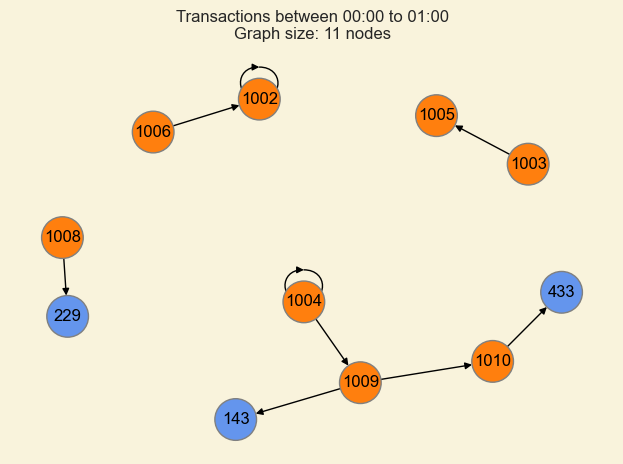

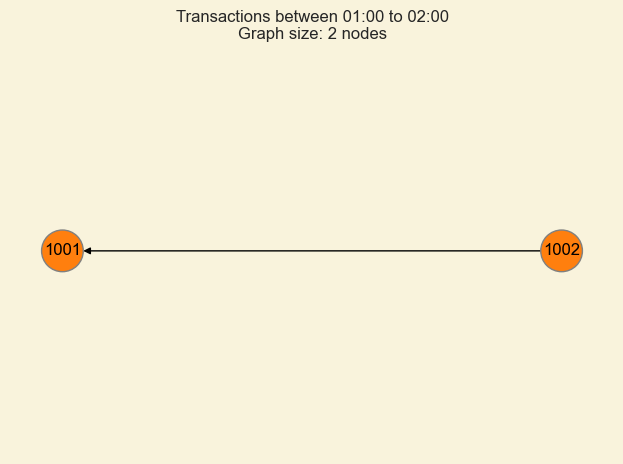

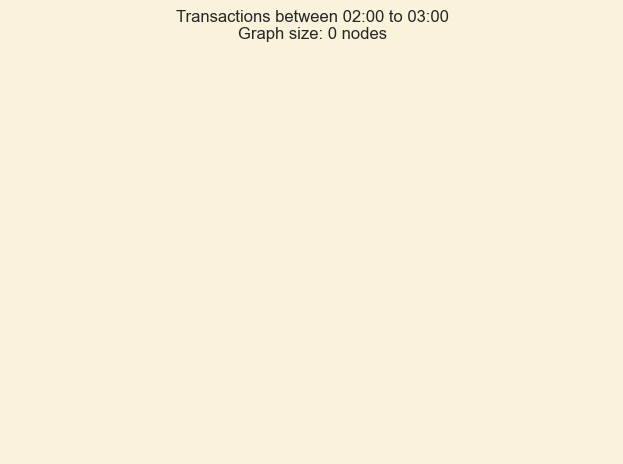

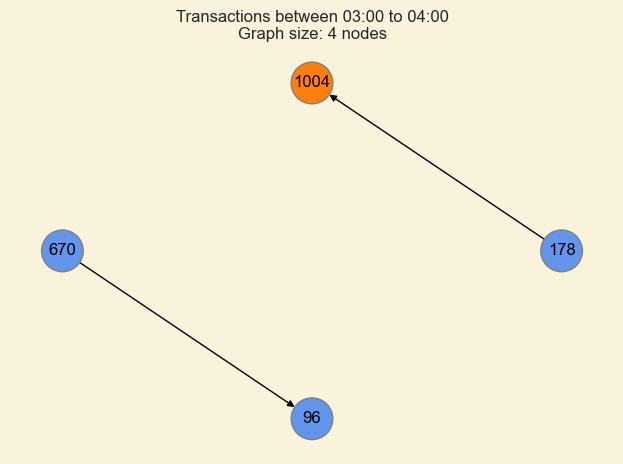

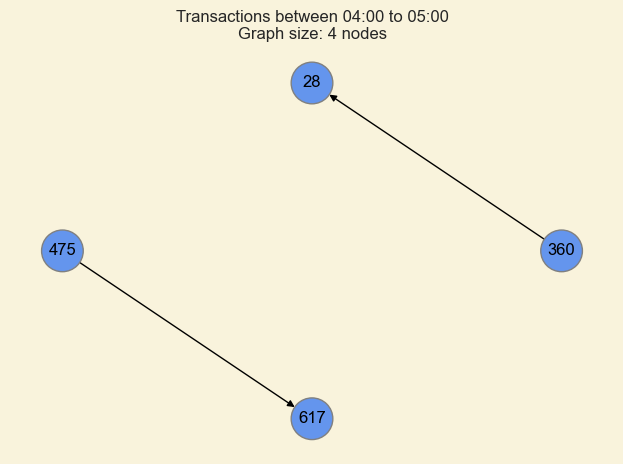

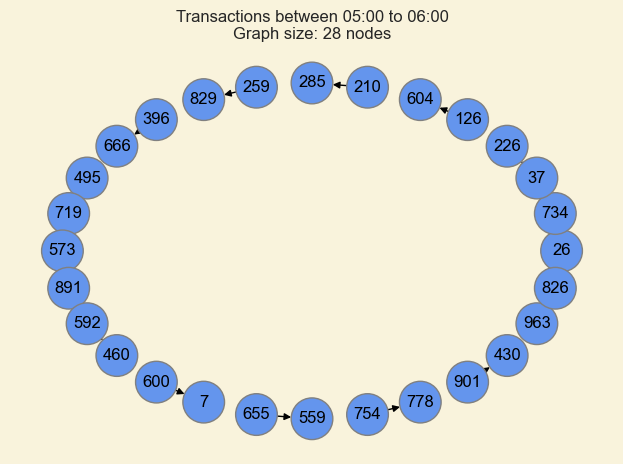

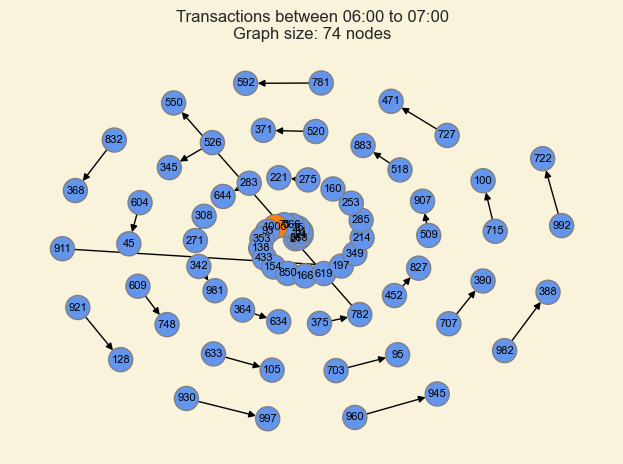

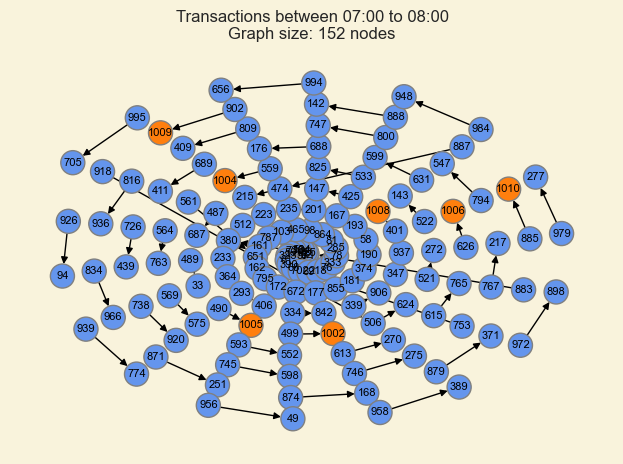

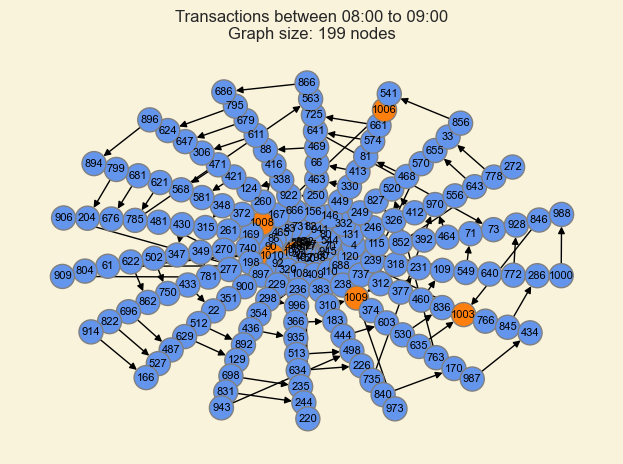

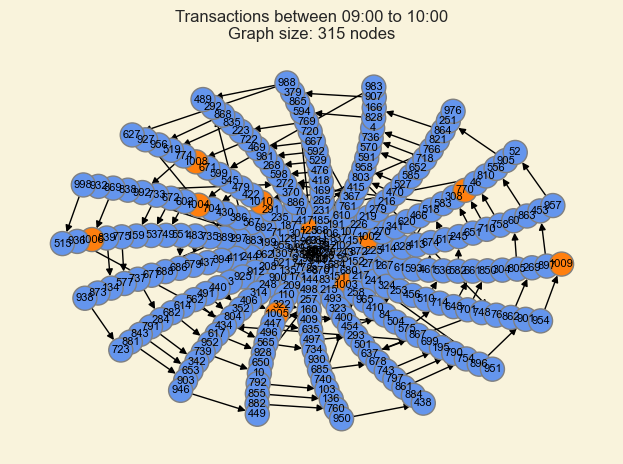

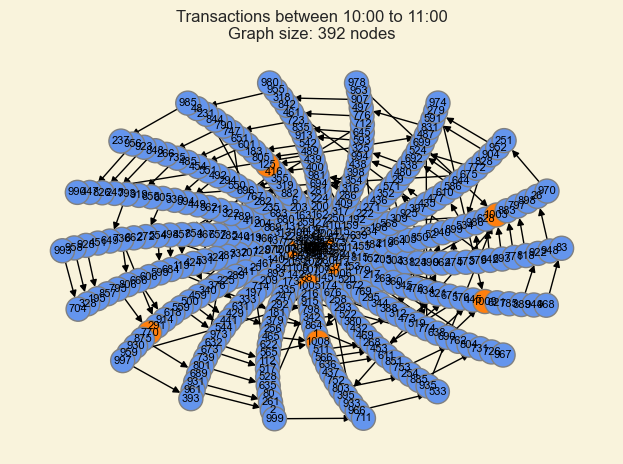

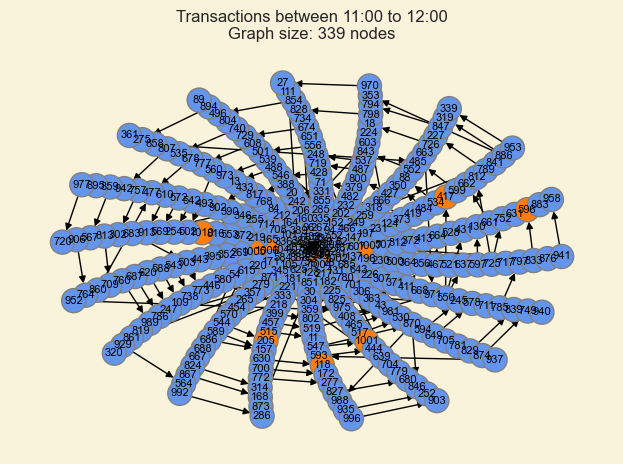

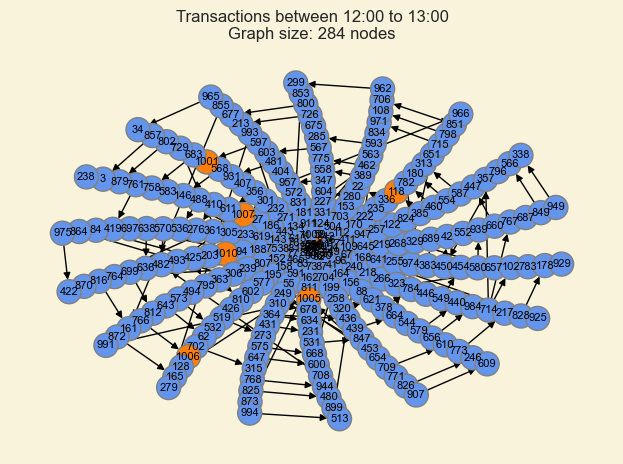

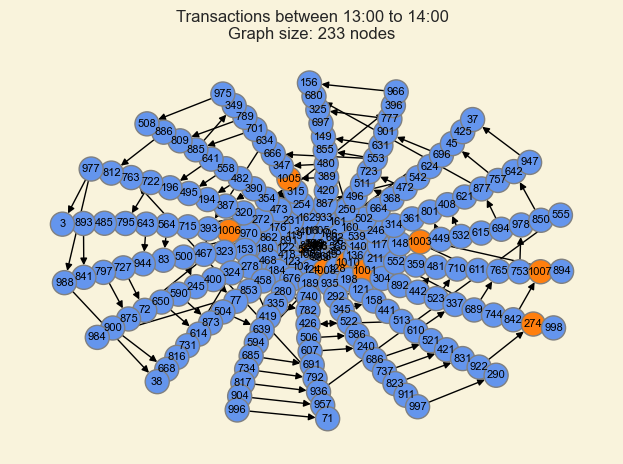

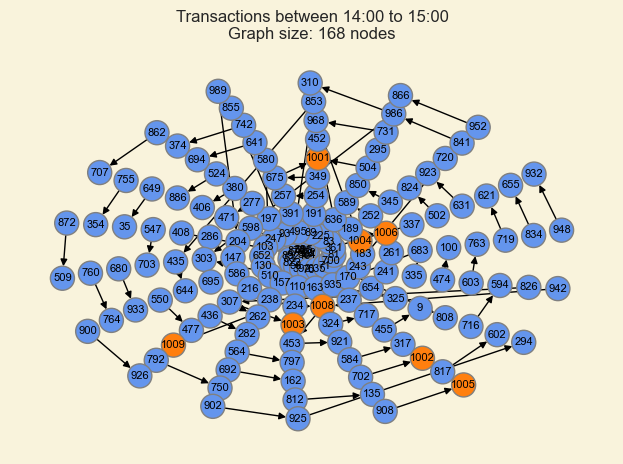

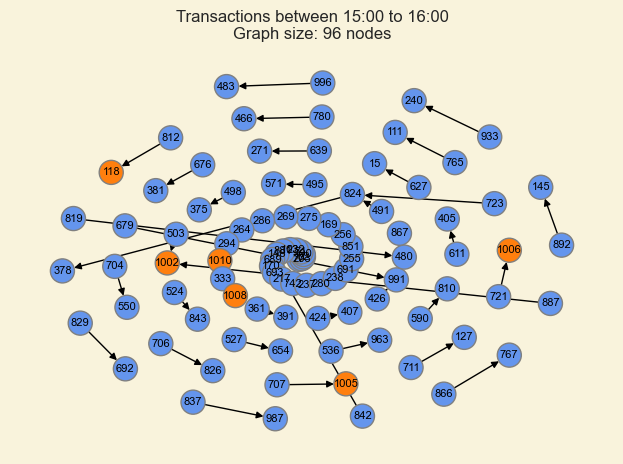

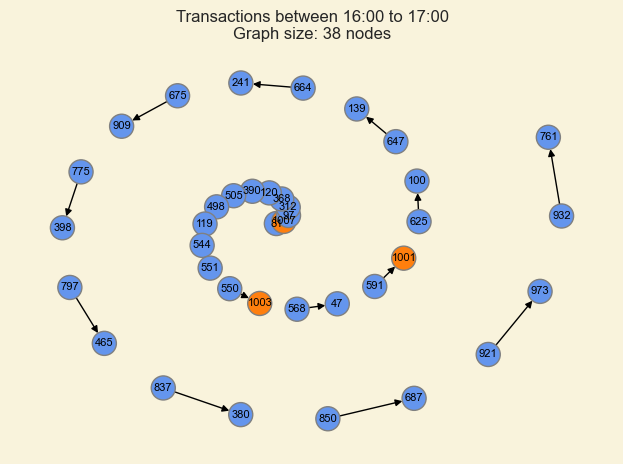

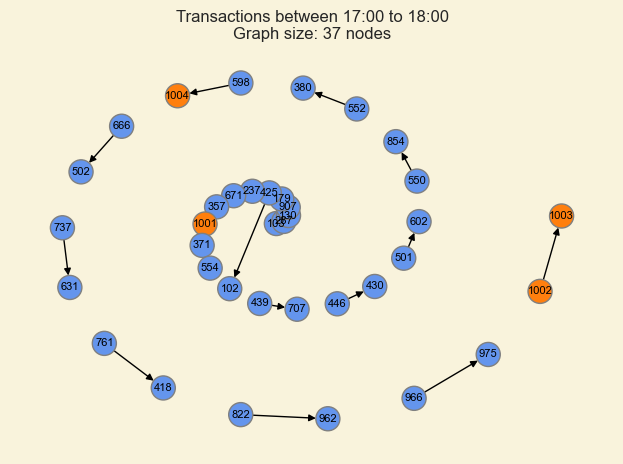

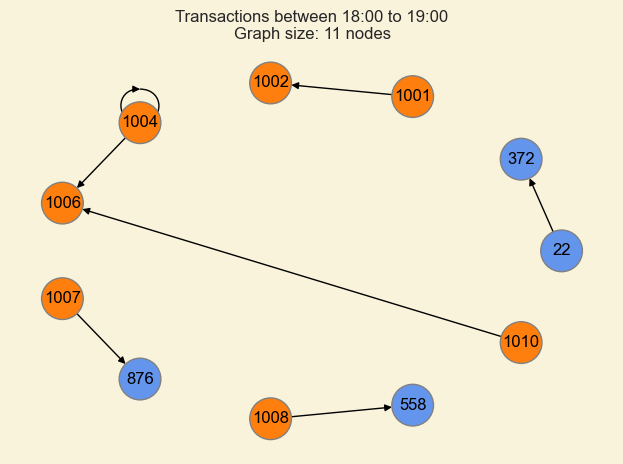

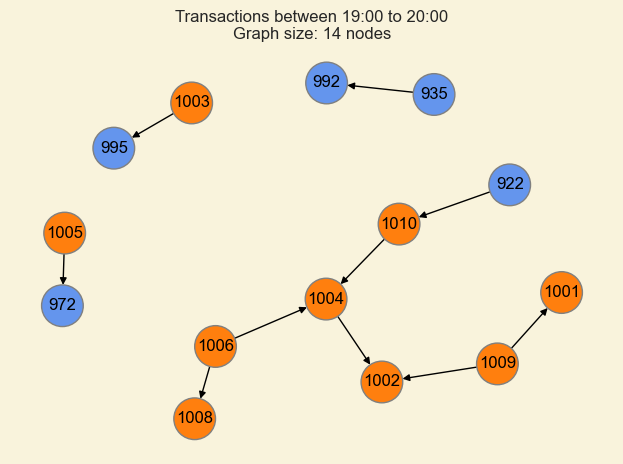

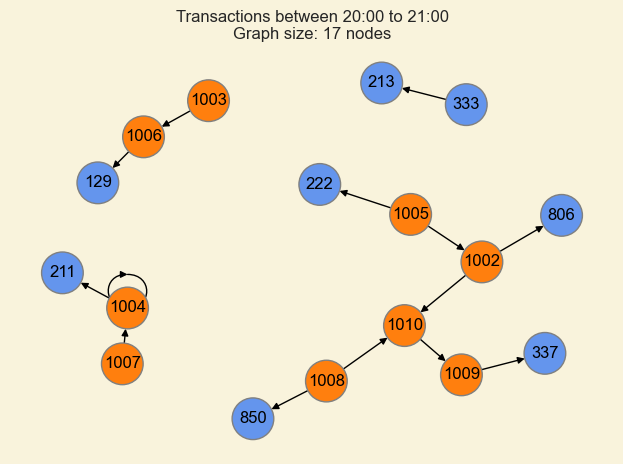

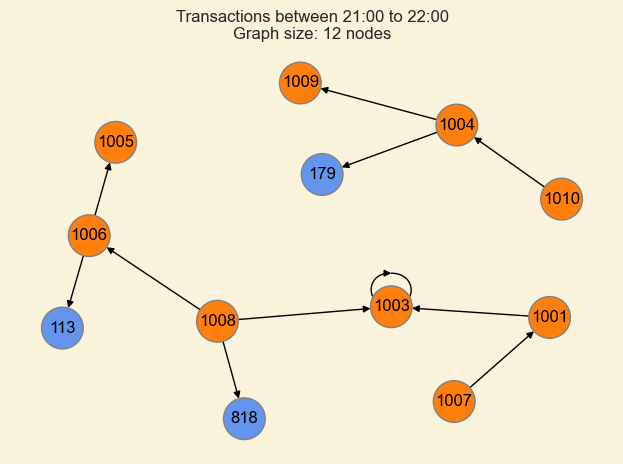

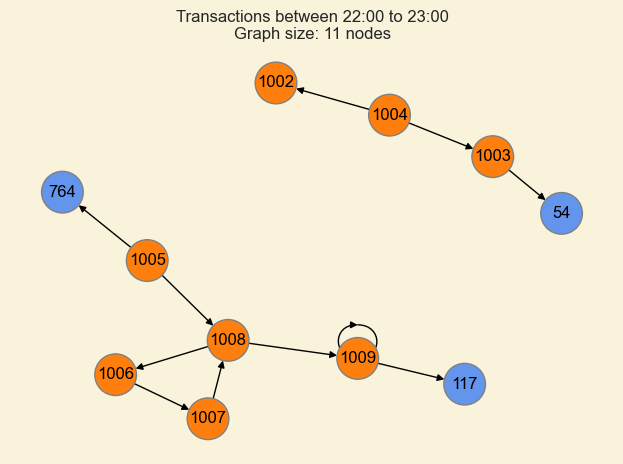

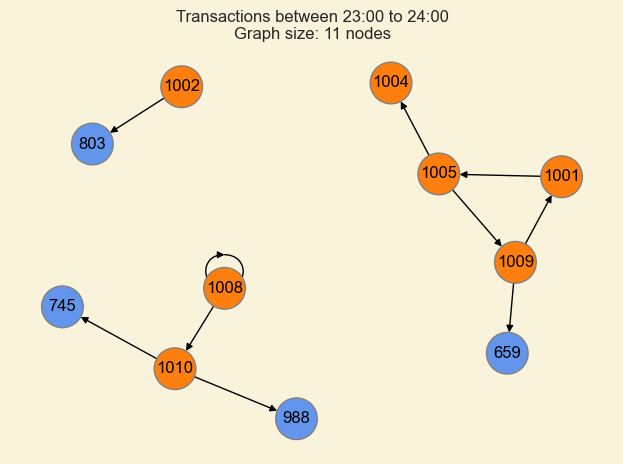

In [80]:
# TODO: debug why there are nodes without labels....
sender_info, X = reset_X()
# with thanks to 
# https://stackoverflow.com/questions/14283341/how-to-increase-node-spacing-for-networkx-spring-layout

num_graphs = 24 
window_size_steps = 24/num_graphs * 4
for i_graph in range(int(num_graphs)):
    START = i_graph * window_size_steps 
    END = START + window_size_steps 
    #print(START, END)
    time_window= txns[(txns.timestep > START) &(txns.timestep < END)][['sender_id', 'receiver_id', 'y_true', 'timestep']] # 2hrs
    edges_list = time_window[['sender_id', 'receiver_id']].to_numpy()

    window_G = nx.DiGraph()
    window_G.add_edges_from(edges_list)
    #print('creating colors')
    colors = []

    for n in window_G.nodes():
        acct_type = true_agent_labels[
            true_agent_labels.sender_id==n].true_sender_type.to_numpy()
        #print(acct_type)
        #print(acct_type, n, window_G.nodes[n])
        window_G.nodes[n]['type'] =  acct_type
        if acct_type == 'normal' :
            colors.append('cornflowerblue')
        else:
            colors.append('tab:orange')

    fig, ax = plt.subplots()
    if len(window_G.nodes) < 35:
        #print('creating layout')
        df = pd.DataFrame(index=window_G.nodes(), columns=window_G.nodes())
        for row, data in nx.shortest_path_length(window_G):
            for col, dist in data.items():
                df.loc[row,col] = dist
        df = df.fillna(df.max().max())

        layout = nx.kamada_kawai_layout(window_G, dist=df.to_dict())
        nx.draw(window_G, with_labels=True, node_color=colors, 
                pos=layout, edge_color='k', node_size=900, linewidths=1)
    else:
        layout = nx.spiral_layout(window_G)
        nx.draw(window_G, with_labels=True, node_color=colors, 
                pos=layout, font_size=8 )#edge_color='k', node_size=900, linewidths=1)

    if len(ax.collections) != 0:
        ax.collections[0].set_edgecolor("gray" )
    plt.title(f'Transactions between {int(START/4):02d}:00 to {int(END/4):02d}:00\n'
                f'Graph size: {len(window_G.nodes)} nodes'
                )
    fig.patch.set_facecolor('#F9F3DC')
    plt.tight_layout()

In [ ]:
# 

In [ ]:
time_window

,sender_id,receiver_id,y_true,timestep
79,47,995,0,75
751,414,250,0,76
762,419,658,0,74
786,431,71,0,77
1848,997,22,0,75
1857,1001,1009,1,77
1871,1002,1010,1,74
1872,1002,1001,1,75
1873,1002,1006,1,79
1883,1003,1003,1,76


In [ ]:
#G = joblib.load('./graph.networkx_v2.8.4.joblib') 

In [ ]:
len(G.nodes)

1006

In [ ]:
len(np.sort(np.array(G.nodes)))

1007

In [65]:
sender_info.sender_id.unique().shape

(994,)

In [ ]:
sender_info.sender_id

0         1
1         2
2         3
3         4
4         5
       ... 
992    1006
993    1007
994    1008
995    1009
996    1010
Name: sender_id, Length: 997, dtype: int64

In [ ]:
txns = pd.read_csv('./txns_list.csv')
txns['time'] = txns.timestep_to_time.apply(pd.to_datetime)
txns['y_true'] = txns.sender_type.apply(lambda x: 1 if x=='suspicious' else 0)
display(txns.sample())


NameError: name 'pd' is not defined

In [ ]:
sender_info[sender_info.num_txns == 0]

,Unnamed: 0,sender_id,txns,txn_mean_time,in_degree,out_degree,num_txns,true_sender_type,true_label,y_true


In [ ]:
colors = []
for i in range(len(G.nodes())):
    my_type = true_agent_labels.iloc[i].true_label
    G.nodes[i+1]['type'] =  my_type 
    if my_type == 'normal' :
        colors.append('white')
    else:
        colors.append('red')

KeyError: 151

In [ ]:
nx.draw(G, with_labels = True, node_color = colors, pos=nx.shell_layout(G))

#nx.draw(G.nodes['type'] =  model.agents[i].type
plt.show()
